In [2]:
import pandas as pd
import xml.etree.ElementTree as ET

from astropy.io.votable import parse
from astropy.io.votable import parse_single_table
from astropy.io.votable.tree import VOTableFile, Resource, Table, Field



# Import required packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pylab import cm

%matplotlib inline
%config InlineBackend.figure_format='svg'

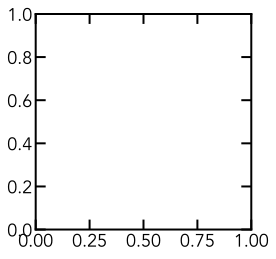

In [3]:
import matplotlib.font_manager as fm
# Collect all the font names available to matplotlib
font_names = [f.name for f in fm.fontManager.ttflist]


# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

# Generate 2 colors from the 'tab10' colormap
colors = cm.get_cmap('tab10', 2)



# Create figure object and store it in a variable called 'fig'
fig = plt.figure(figsize=(3, 3))

# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])


# Hide the top and right spines of the axis
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)

# Edit the major and minor ticks of the x and y axes
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')


In [7]:
from astropy.io import fits
import pyfits
gamma_week_path='/Users/brettlv/Downloads/mwa_paper/mwa_cover/OJ287/OJ287_604800.lc'
gamma_day_path='/Users/brettlv/Downloads/mwa_paper/mwa_cover/OJ287/OJ287_86400.lc'
lightcurve_day=pyfits.open(gamma_day_path)

In [16]:
lightcurve_day[1].columns

ColDefs(
    name = 'START'; format = 'D'; unit = 's'
    name = 'STOP'; format = 'D'; unit = 's'
    name = 'NAME'; format = '6A'
    name = 'RA'; format = 'E'; unit = 'deg'
    name = 'DEC'; format = 'E'; unit = 'deg'
    name = 'FLUX_1000_300000'; format = 'E'; unit = 'photons/cm**2/s'
    name = 'ERROR_1000_300000'; format = 'E'; unit = 'photons/cm**2/s'
    name = 'UL_1000_300000'; format = 'L'
    name = 'FLUX_300_1000'; format = 'E'; unit = 'photons/cm**2/s'
    name = 'ERROR_300_1000'; format = 'E'; unit = 'photons/cm**2/s'
    name = 'UL_300_1000'; format = 'L'
    name = 'FLUX_100_300000'; format = 'E'; unit = 'photons/cm**2/s'
    name = 'ERROR_100_300000'; format = 'E'; unit = 'photons/cm**2/s'
    name = 'UL_100_300000'; format = 'L'
    name = 'DURATION'; format = 'E'; unit = 's'
    name = 'TEST_STATISTIC'; format = 'E'
)

In [8]:
time_day=lightcurve_day[1].data['START']
count_day=lightcurve_day[1].data['FLUX_100_300000']
counterr_day=lightcurve_day[1].data['ERROR_100_300000']
during_day=lightcurve_day[1].data['DURATION']
t_day=time_day/86400+lightcurve_day[1].header['MJDREFI']+7.428703703703703e-4

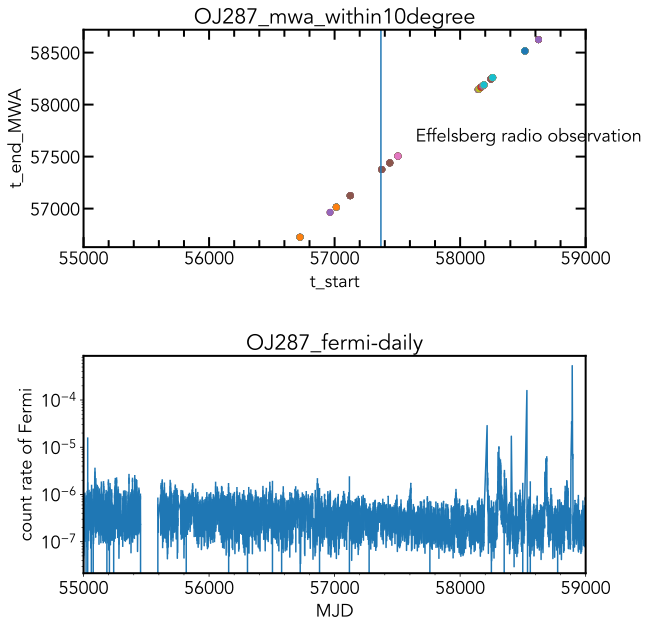

In [17]:
path = '/Users/brettlv/Downloads/mwa_paper/mwa_cover/OJ287_10degree.xml'
votable = parse(path)
table = parse_single_table(path).to_table()

# Create figure object and store it in a variable called 'fig'
fig = plt.figure(figsize=(9, 10))
# Add axes object to our figure that takes up entire figure
#ax = fig.add_axes([0, 0, 1, 1])
ax=fig.add_subplot(211)

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1000))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(200))
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')



for i,j in zip(table[table.colnames[10]],table[table.colnames[11]]):
    ax.scatter(i,j)
    
ax2=fig.add_subplot(212,sharex=ax)    
ax2.errorbar(t_day,count_day,counterr_day)    
    
ax.set_xlabel('t_start')
ax.set_ylabel('t_end_MWA')

ax2.set_xlabel('MJD')
ax2.set_ylabel('count rate of Fermi')
ax2.semilogy()

time_left,timeright=(55000,59000)
ax.set_xlim(time_left,timeright)
#ax.axvline(57644.5)
ax.axvline(57369)
ax.text(57644.5,57645,'Effelsberg radio observation')
#ax.axvspan(57632,57644.5)
#ax2.axvspan(57632,57644.5)

ax.set_title('OJ287_mwa_within10degree') 
ax2.set_title('OJ287_fermi-daily') 
plt.subplots_adjust(hspace = 0.5)
plt.savefig('/Users/brettlv/Downloads/mwa_paper/mwa_cover/OJ287_10degree_%s-%s.png'%(time_left,timeright))